Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display all columns
pd.set_option('display.max_columns', None)

Load Dataset

In [17]:
#Load Dataset
data = pd.read_csv('day.csv')

# Display first 5 rows
data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Basic Information

In [18]:
print("Shape of dataset:", data.shape)
print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())


Shape of dataset: (731, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Missing Values:
instant       0
dteday      

Statistical Summary

In [19]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Check Duplicates & Clean Data

In [20]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
data.drop_duplicates(inplace=True)
print("Duplicates removed (if found).")


Number of duplicate rows: 0
Duplicates removed (if found).


Feature Overview

In [21]:
print("\nColumns in dataset:")
print(data.columns)

data.rename(columns={'yr': 'year', 'mnth': 'month', 'weathersit': 'weather_situation'}, inplace=True)

print("\n Column names standardized.")



Columns in dataset:
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

 Column names standardized.


Univariate Analysis

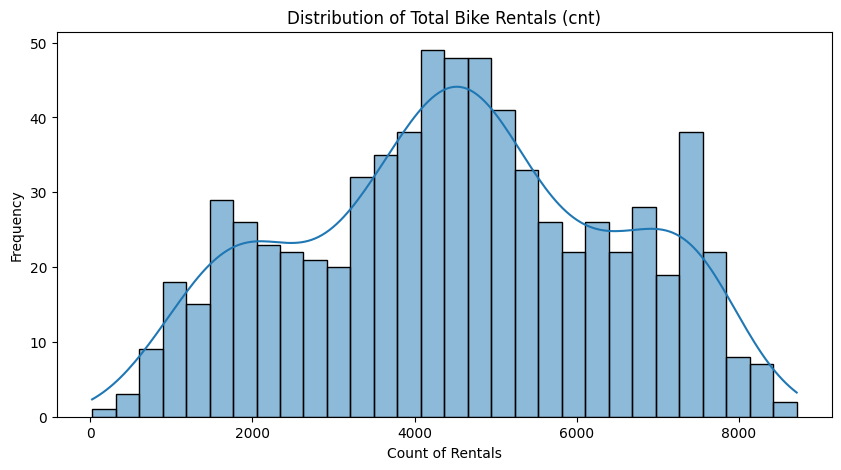

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data['cnt'], bins=30, kde=True)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Count of Rentals')
plt.ylabel('Frequency')
plt.show()

Correlation Heatmap

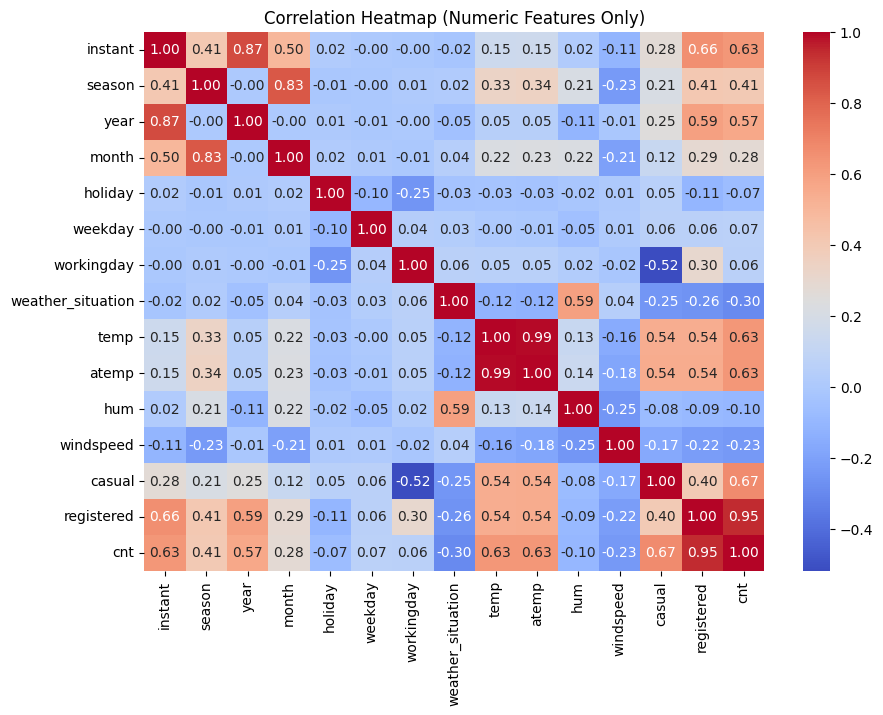

In [23]:
plt.figure(figsize=(10,7))

# select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()


Monthly Bike Demand Trend

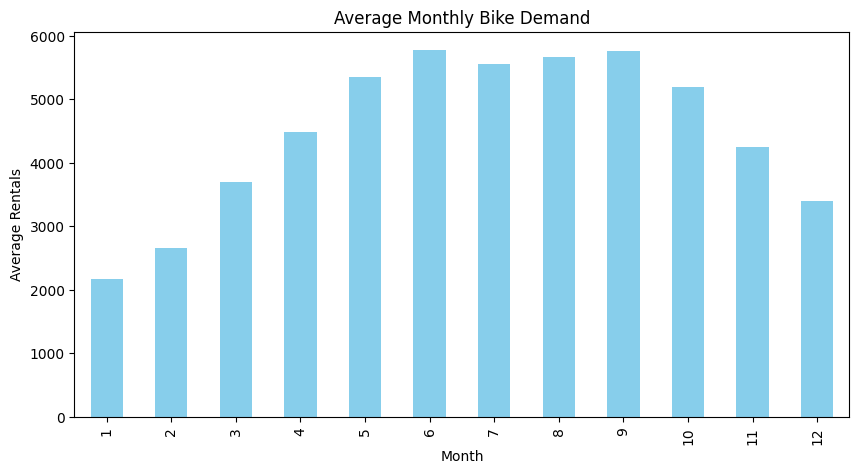

In [24]:
monthly_demand = data.groupby('month')['cnt'].mean()

plt.figure(figsize=(10,5))
monthly_demand.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Bike Demand')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.show()

Weather Impact Analysis

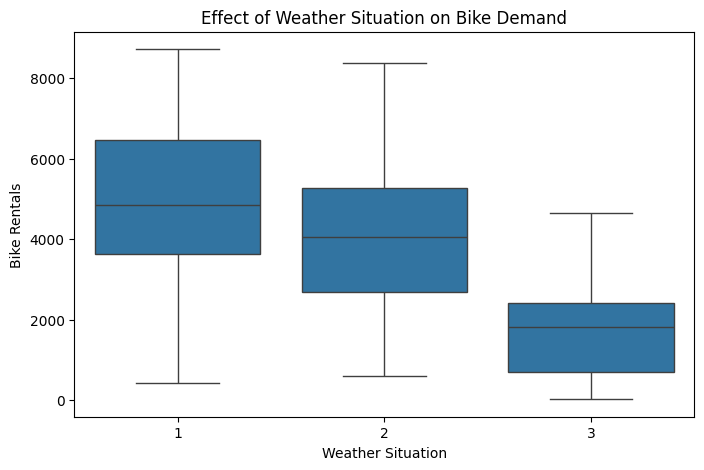

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='weather_situation', y='cnt', data=data)
plt.title('Effect of Weather Situation on Bike Demand')
plt.xlabel('Weather Situation')
plt.ylabel('Bike Rentals')
plt.show()

Save Cleaned Data

In [26]:
data.to_csv('day_cleaned.csv', index=False)
print(" Cleaned data saved as day_cleaned.csv")

 Cleaned data saved as day_cleaned.csv
